# Requerimientos tecnicos.

Para ejecutar el codigo es necesario tener instalado Python version 2.7 o 3.6 asi como distintos paquetes o librerias. Se recomienda tener instalada la Suite Anaconda donde se entrontraran preinstalados la mayoria de los paquetes y librerias que son necesarios.

# Base de Datos

Para nuestro modelo hemos obtenido una base de datos de una entidad financiera con 450.000 clientes con informacion y  productos de cada uno de estos. Desde si el saldo que tiene en cuenta , fondo de inversion o plan de pension,  el recorrido comercial del cliente a ojos de la entidad financiera, si esta o no carteriazo o si tiene o no tiene productos como seguros, nominas, tarjetas o recibos domiciliados.
La informacion detallada del data set se encuentra dentro de una de las carpetas de este repositorio con el nombre de Data-Codes

    


# Carga del Data Frame

# Objetivo

Nuestro Objetivo es construir un modelo de clasificacion con el fin de identificar si un cliente nuevo es susceptible de contratar o no un Seguro de hogar.  Utilizaremos distintos modelos de clasificacion que seran finalmente comparados para quedarnos con uno.

# Comenzamos.
Iremos cargando las librerias que vamos a usar para nuestro modelo segun las vayamos necesitando. 


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl
import seaborn as sb

Leemos la base de datos y asociamos a la variable df el data set

In [3]:
df = pd.read_csv('/home/dsc/Master-Kschool/TFM/Financial-Product-Sales-Forecast-Model/0rigin_data/cleanned_data/df.tfm')

Realizamos un primer analisis explotatorio EDA de la Base de Datos.  Con este analisis esperamos obtener informacion basica de todo el Data Frame e informacion mas profunda de la variable objetivo - Target - Seguro de Hogar
    


#  EDA

### Mostramos un sample de 5 lineas del Data Frame 

In [3]:
df.sample(5)

,cliente,saldo_captacion,esta_carterizado,cliente_bbp,tipo_gestor,gestor,cartera_patron,codigo_cartera,digital_3_meses,camino_digital,...,edad,seg_valor,seg_recorrido,dz,oficina,lp_seg_vida,lp_seg_acc,lp_seg_salud,lp_seg_hogar,lp_seg_auto
136554,136555,214137.58,SI,NO,ASESOR FINANCIERO,11967.0,TUTELA,27825.0,NO,SIN USO,...,73.0,ALTO,BAJO RECORRIDO,2,217,0,0,0,0,0
217675,217676,180797.17,SI,NO,ASESOR FINANCIERO,37491.0,ASESORAMIENTO FINANCIERO,16270.0,SI,TRANSACCIONAL,...,44.0,ALTO,BAJO RECORRIDO,8,811,0,0,0,0,0
255402,255403,26107.42,SI,NO,ASESOR FINANCIERO,8337.0,TUTELA,9904.0,NO,POCO USO,...,41.0,ALTO,ALTO RECORRIDO,8,814,0,0,0,0,0
54203,54204,307249.60,SI,NO,ASESOR FINANCIERO,34000.0,ASESORAMIENTO FINANCIERO,34624.0,NO,SIN USO,...,78.0,ALTO,BAJO RECORRIDO,1,110,0,0,0,0,0
81912,81913,853.07,SI,NO,ASESOR FINANCIERO,8900.0,ASESORAMIENTO FINANCIERO,35667.0,NO,SIN USO,...,76.0,MEDIO,MEDIO RECORRIDO,10,1013,0,0,0,0,0


### Dimension y Forma del Data Frame. La base de datos consta de 451.374 filas, 30 columnas y 13.5mm de datos.

In [4]:
print('Filas = ', df.shape[0])
print('Columnas = ', df.shape[1])
print('Datos = ',df.size)

Filas =  451374
Columnas =  30
Datos =  13541220


### Nombre de las Columnas

In [5]:
df.columns

Index(['cliente', 'saldo_captacion', 'esta_carterizado', 'cliente_bbp',
       'tipo_gestor', 'gestor', 'cartera_patron', 'codigo_cartera',
       'digital_3_meses', 'camino_digital', 'saldo_financiacion', 'saldo_ffii',
       'saldo_plp', 'lp_dom_ingresos', 'lp_tjta_cto', 'lp_tjt_rev', 'lp_rbos',
       'lp_of_int', 'marca_bp', 'marca_ccte', 'edad', 'seg_valor',
       'seg_recorrido', 'dz', 'oficina', 'lp_seg_vida', 'lp_seg_acc',
       'lp_seg_salud', 'lp_seg_hogar', 'lp_seg_auto'],
      dtype='object')

### Informacion de las columnas - existencia de nulos y tipos de datos.  Comprobamos que el DF no tiene NANs y que los tipos de datos son los siguientes:

- float64 (7 variables)
- int64    (13 variables)
- object (10 variables)
    

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 451374 entries, 0 to 451373
Data columns (total 30 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   cliente             451374 non-null  int64  
 1   saldo_captacion     451374 non-null  float64
 2   esta_carterizado    451374 non-null  object 
 3   cliente_bbp         451374 non-null  object 
 4   tipo_gestor         451374 non-null  object 
 5   gestor              451374 non-null  float64
 6   cartera_patron      451374 non-null  object 
 7   codigo_cartera      451374 non-null  float64
 8   digital_3_meses     451374 non-null  object 
 9   camino_digital      451374 non-null  object 
 10  saldo_financiacion  451374 non-null  float64
 11  saldo_ffii          451374 non-null  float64
 12  saldo_plp           451374 non-null  float64
 13  lp_dom_ingresos     451374 non-null  int64  
 14  lp_tjta_cto         451374 non-null  int64  
 15  lp_tjt_rev          451374 non-nul

### El DF esta formado por 30 variables distintas las cuales vamos a segmentar y distinguir por bloques de cara a un mejor estudio del dataframe.

- Bloque 1 - Variables Edad 1 
- Bloque 2 - Variables de Ahorro - Financiación 4 
- Bloque 3 - Variables de Servicios 5 
- Bloque 4 - Variables de Seguros 5
- Bloque 5 - Variables Categoricas de Segmentacion 10 
- Bloque 6 - Variables unidades de negocio 5 

In [14]:
variables_edad = df['edad']
variables_unidad_negocio = df[['cliente','gestor','codigo_cartera','oficina','dz']]
variables_ahorro_financiacion = df[['saldo_captacion','saldo_financiacion','saldo_ffii','saldo_plp']]
variables_servicio = df[['lp_dom_ingresos','lp_tjta_cto','lp_tjt_rev','lp_rbos','lp_of_int']]
variables_seguros = df[['lp_seg_vida','lp_seg_acc','lp_seg_salud','lp_seg_auto','lp_seg_hogar']]
variables_segmentacion = df[['esta_carterizado','cliente_bbp','tipo_gestor','cartera_patron',
                            'digital_3_meses','camino_digital','marca_bp','marca_ccte',
                            'seg_valor','seg_recorrido']]

### __Estudiamos las variables por  Bloques, mediante visualizacion por histrogramas y descripcion estadistica.__ 



### Bloque 1  Variable Edad 

count    451374.000000
mean         58.268941
std          19.018368
min           0.000000
25%          45.000000
50%          60.000000
75%          73.000000
max         118.000000
Name: edad, dtype: float64

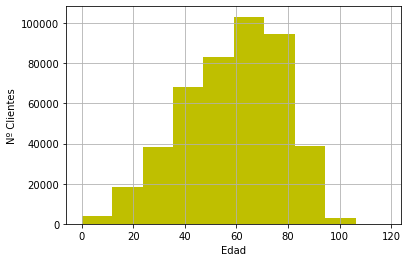

In [15]:
variables_edad.hist(color = 'y');
plt.xlabel('Edad')
plt.ylabel('Nº Clientes')
variables_edad.describe()

### Bloque 2  Variables Ahorro - Financiacion

,saldo_captacion,saldo_financiacion,saldo_ffii,saldo_plp
count,4.513740e+05,4.513740e+05,4.513740e+05,451374.000000
mean,4.971455e+04,1.380668e+04,8.483663e+03,1728.478326
std,8.792364e+04,4.296438e+04,3.844671e+04,10780.622435
min,-5.104332e+04,-4.900000e+03,0.000000e+00,0.000000
25%,1.813182e+03,0.000000e+00,0.000000e+00,0.000000
50%,1.520828e+04,0.000000e+00,0.000000e+00,0.000000
75%,6.446964e+04,6.841775e+02,0.000000e+00,0.000000
max,5.290216e+06,2.896317e+06,3.130940e+06,459937.460000


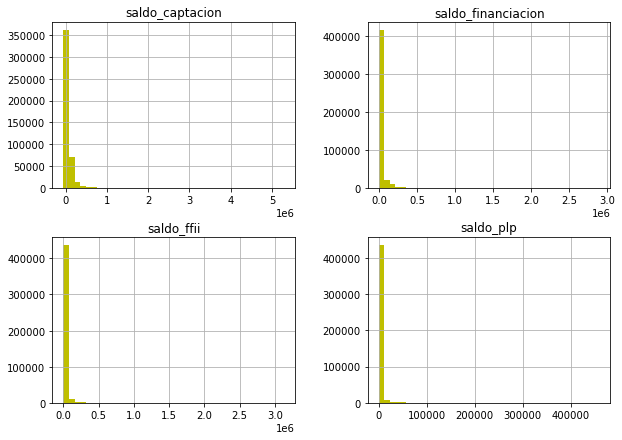

In [9]:
# Se observa como la mayoria de los clientes tienen poco saldo en cada una de las variables.
# Hay concentracion de clientes con saldos bajos o igual a cero.
# En el modelo estas variables seran transformadas
variables_ahorro_financiacion.hist(figsize = (10,7), color = 'y', bins = 40);
variables_ahorro_financiacion.describe()

### Bloque 3 Variables de Servicios

,lp_dom_ingresos,lp_tjta_cto,lp_tjt_rev,lp_rbos,lp_of_int
count,451374.000000,451374.000000,451374.000000,451374.000000,451374.000000
mean,0.707125,0.550479,0.237577,0.871856,0.773164
std,0.455082,0.497446,0.425599,0.334251,0.418786
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,1.000000
50%,1.000000,1.000000,0.000000,1.000000,1.000000
75%,1.000000,1.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000


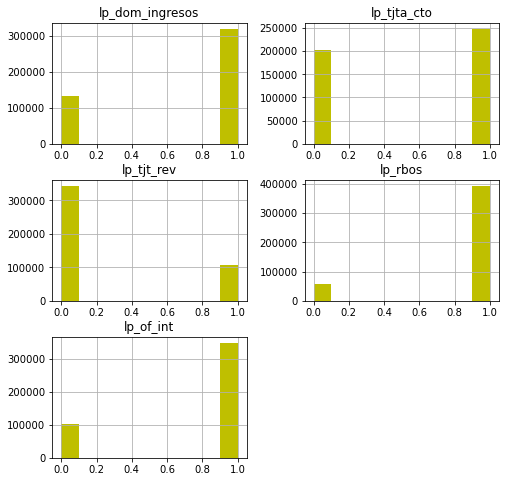

In [10]:
# Variables de servicio, se comprueba que en gral hay mas clientes que tienen el servicio de los que no
variables_servicio.hist(figsize = (8,8), color = 'y');
variables_servicio.describe()

In [11]:

print('INFORMACION VARIABLES SERVICIOS')
print('====================================')
print (df['lp_dom_ingresos'].value_counts(normalize = True))
print('====================================')
print (df['lp_tjta_cto'].value_counts(normalize = True))
print('====================================')
print (df['lp_tjt_rev'].value_counts(normalize = True))
print('====================================')
print (df['lp_rbos'].value_counts(normalize = True))
print('====================================')
print (df['lp_of_int'].value_counts(normalize = True))
print('====================================')


INFORMACION VARIABLES SERVICIOS
1    0.707125
0    0.292875
Name: lp_dom_ingresos, dtype: float64
1    0.550479
0    0.449521
Name: lp_tjta_cto, dtype: float64
0    0.762423
1    0.237577
Name: lp_tjt_rev, dtype: float64
1    0.871856
0    0.128144
Name: lp_rbos, dtype: float64
1    0.773164
0    0.226836
Name: lp_of_int, dtype: float64


### Bloque 4 Variables de Seguros

,lp_seg_vida,lp_seg_acc,lp_seg_salud,lp_seg_auto,lp_seg_hogar
count,451374.000000,451374.000000,451374.000000,451374.000000,451374.000000
mean,0.083868,0.019997,0.004263,0.013807,0.130293
std,0.277191,0.139989,0.065149,0.116688,0.336626
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000


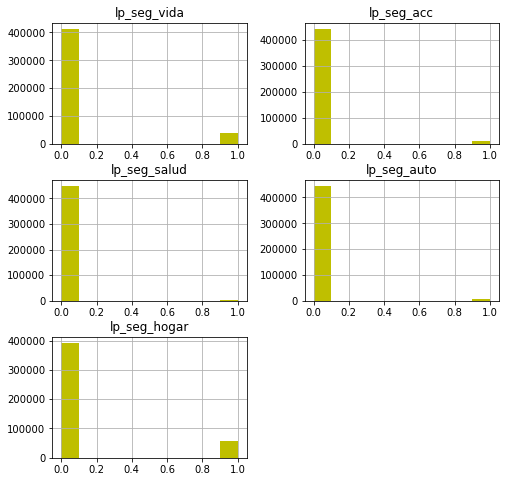

In [12]:
# Entre estas variables e encuentra nuestro TARGET. Seguro de Hogar.
# Se comprueba como en general la mayoria de los clientes no tienen el seguro de referencia.
variables_seguros.hist(figsize = (8,8), color = 'y');
variables_seguros.describe()

In [13]:
print('INFORMACION VARIABLES SEGUROS')
print('====================================')
print(df['lp_seg_vida'].value_counts(normalize = True))
print('====================================')  
print(df['lp_seg_acc'].value_counts(normalize = True))
print('====================================')  
print(df['lp_seg_salud'].value_counts(normalize = True))
print('====================================')  
print(df['lp_seg_auto'].value_counts(normalize = True))
print('====================================')  
print(df['lp_seg_hogar'].value_counts(normalize = True))
print('====================================')


INFORMACION VARIABLES SEGUROS
0    0.916132
1    0.083868
Name: lp_seg_vida, dtype: float64
0    0.980003
1    0.019997
Name: lp_seg_acc, dtype: float64
0    0.995737
1    0.004263
Name: lp_seg_salud, dtype: float64
0    0.986193
1    0.013807
Name: lp_seg_auto, dtype: float64
0    0.869707
1    0.130293
Name: lp_seg_hogar, dtype: float64


###  Bloque 5 Variables Segmentacion

In [14]:
# Informacion variables categoricas
print('INFORMACION VARIABLES CATEGORICAS')
print('====================================')  
print(df['esta_carterizado'].value_counts(normalize = True))
print('====================================')  
print(df['cliente_bbp'].value_counts(normalize = True))
print('====================================')  
print(df['tipo_gestor'].value_counts(normalize = True))
print('====================================')  
print(df['cartera_patron'].value_counts(normalize = True))
print('====================================')  
print(df['digital_3_meses'].value_counts(normalize = True))
print('====================================')  
print(df['marca_bp'].value_counts(normalize = True))
print('====================================')  
print(df['camino_digital'].value_counts(normalize = True))
print('====================================')  
print(df['marca_ccte'].value_counts(normalize = True))
print('====================================')  
print(df['seg_valor'].value_counts(normalize = True))
print('====================================')  
print(df['seg_recorrido'].value_counts(normalize = True))


INFORMACION VARIABLES CATEGORICAS
SI    0.904416
NO    0.095584
Name: esta_carterizado, dtype: float64
NO    1.0
Name: cliente_bbp, dtype: float64
ASESOR FINANCIERO          0.894690
SIN GESTOR                 0.095584
SUBDIRECCIÓN DE OFICINA    0.009726
Name: tipo_gestor, dtype: float64
ASESORAMIENTO FINANCIERO    0.697767
TUTELA                      0.206649
SIN CARTERA                 0.095584
Name: cartera_patron, dtype: float64
SI    0.510096
NO    0.489904
Name: digital_3_meses, dtype: float64
NO    0.720633
SI    0.279367
Name: marca_bp, dtype: float64
SIN USO          0.430175
CONSULTIVO       0.264466
TRANSACCIONAL    0.215511
POCO USO         0.058242
COMPRADOR        0.031606
Name: camino_digital, dtype: float64
AF           0.612485
SIN MARCA    0.270126
CCTE         0.117388
Name: marca_ccte, dtype: float64
ALTO     0.552963
MEDIO    0.298890
BAJO     0.148148
Name: seg_valor, dtype: float64
ALTO RECORRIDO     0.363315
MEDIO RECORRIDO    0.332148
BAJO RECORRIDO     0.28333

### Bloque 6  Variables unidades de Negocio

In [15]:
#  **** MAPA CONTEXTUAL **** Informacion Unidades de Negocio.
print('INFORMACION VARIABLES UNIDADES DE NEGOCIO')
print('====================================')  
print('Numero Clientes: ', df['cliente'].nunique())
print('Numero Direcciones Zona: ',df['dz'].nunique())
print('Numero Oficinas: ', df['oficina'].nunique())
print('Numero Gestores: ', df['gestor'].nunique())


INFORMACION VARIABLES UNIDADES DE NEGOCIO
Numero Clientes:  451374
Numero Direcciones Zona:  11
Numero Oficinas:  162
Numero Gestores:  458


In [63]:
variables_unidad_negocio

,cliente,gestor,codigo_cartera,oficina,dz
0,1,18287.0,14881.0,210,2
1,2,18287.0,14881.0,210,2
2,3,18287.0,28332.0,210,2
3,4,41475.0,14204.0,210,2
4,5,39000.0,14219.0,210,2
...,...,...,...,...,...
451369,451370,10415.0,14297.0,1024,10
451370,451371,35494.0,40785.0,1024,10
451371,451372,10415.0,27685.0,1024,10
451372,451373,10415.0,27685.0,1024,10


Numero de Oficinas por DZ 
dz
1     15
2     13
3     17
4     16
5     17
6     15
7     13
8     11
9     16
10    15
11    14
Name: oficina, dtype: int64


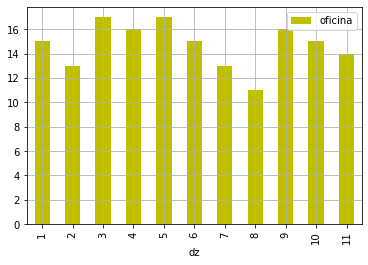

In [16]:
# Numero oficinas por cada DZ
print('Numero de Oficinas por DZ ')
print(df.groupby('dz')['oficina'].nunique())
df.groupby('dz')['oficina'].nunique().plot(kind = 'bar', legend = 'Reverse', grid = True, color = 'y')
plt.show()

Numero de Clientes por DZ 
dz
1     45534
2     35406
3     48081
4     38749
5     51468
6     42198
7     37926
8     21690
9     40227
10    42360
11    47735
Name: cliente, dtype: int64


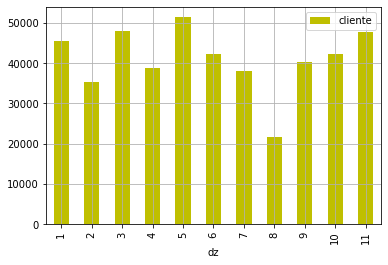

In [17]:
# Numero Clientes por cada DZ
print('Numero de Clientes por DZ ')
print(df.groupby('dz')['cliente'].nunique())
df.groupby('dz')['cliente'].nunique().plot(kind = 'bar', legend = 'Reverse', grid = True, color = 'y')
plt.show()

In [18]:
# Numero Clientes por oficina
# Informacion estadistica de los clientes por oficinas
df.groupby('oficina')['cliente'].nunique().describe()

count     162.000000
mean     2786.259259
std      1025.420335
min      1185.000000
25%      2000.500000
50%      2619.500000
75%      3357.000000
max      5755.000000
Name: cliente, dtype: float64

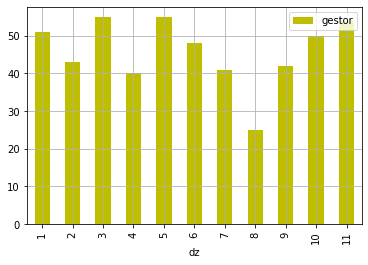

In [19]:
# Numero de gestores por DZ
df.groupby('dz')['gestor'].nunique().describe
df.groupby('dz')['gestor'].nunique().plot(kind = 'bar', legend = 'Reverse', grid = True, color = 'y')
plt.show()


In [20]:
df.groupby('dz')['gestor'].nunique().describe()

count    11.000000
mean     45.818182
std       8.931049
min      25.000000
25%      41.500000
50%      48.000000
75%      52.500000
max      55.000000
Name: gestor, dtype: float64

### Una vez estudiadas las variables en bloques ,  de cara a ir pensando en el modelo de clasificacion buscaremos de forma grafica las posibles correlaciones que pueda haber entre las variables. Nos quedamos solo con aquellas variables con las que vamos a generar el modelo

In [32]:
model_df = df[['edad','saldo_captacion','saldo_financiacion','saldo_ffii','saldo_plp',
              'lp_dom_ingresos','lp_tjta_cto','lp_tjt_rev','lp_rbos','lp_of_int',
              'lp_seg_vida','lp_seg_acc','lp_seg_salud','lp_seg_auto','lp_seg_hogar',
              'cartera_patron','digital_3_meses','camino_digital','marca_bp','marca_ccte',
              'seg_valor','seg_recorrido']]
               

In [31]:
model_df.columns

Index(['edad', 'saldo_captacion', 'saldo_financiacion', 'saldo_ffii',
       'saldo_plp', 'lp_dom_ingresos', 'lp_tjta_cto', 'lp_tjt_rev', 'lp_rbos',
       'lp_of_int', 'lp_seg_vida', 'lp_seg_acc', 'lp_seg_salud', 'lp_seg_auto',
       'lp_seg_hogar', 'cartera_patron', 'digital_3_meses', 'camino_digital',
       'marca_bp', 'marca_ccte', 'seg_valor', 'seg_recorrido'],
      dtype='object')

###  Correlaciones entre Variables

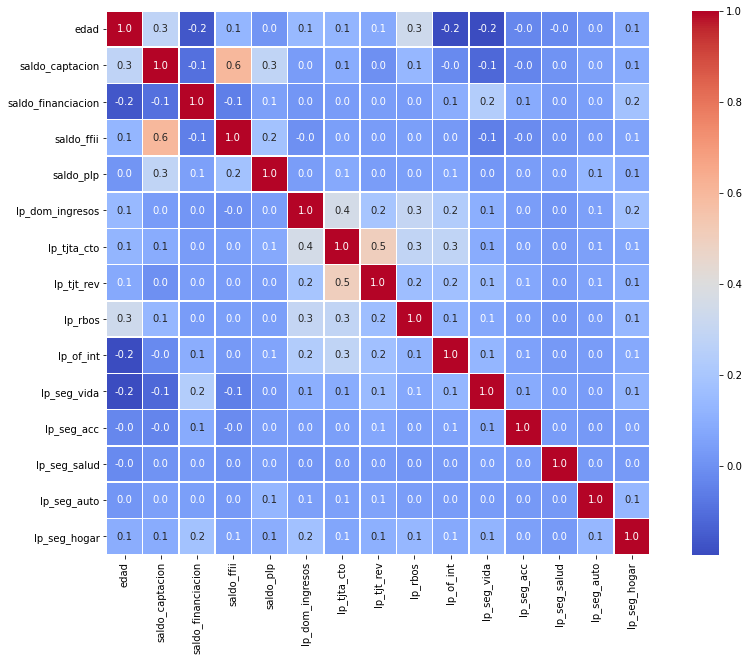

In [33]:
# Existencia de correlacion entre variables numericas - Ploteamos la matriz de correlacion 
# En general baja correlacion entre las variables
# En alguna ocasion se visializa correlacion negativa
import seaborn as sns
correlation_mat = model_df.corr()
fig, ax = plt.subplots(figsize=(15,10)) 
sns.heatmap(correlation_mat, annot = True, cmap = 'coolwarm', square = True, 
            linewidths=.5, fmt=".1f",annot_kws={'size':10},ax=ax)

plt.show()

## __ESTUDIO DEL TARGET __Seguro_Hogar____

- Que estructura tiene el Target ?
- Como se relaciona con el resto de variables
- Son importantes todas las variables ?
- Podemos descartar alguna variable de cara al modelo ?

In [22]:
# Variable Binaria.  1 Tiene Seguro - 0 No tiene Seguro
df['lp_seg_hogar'].unique()

array([1, 0])

### Estructura de Target

0    0.869707
1    0.130293
Name: lp_seg_hogar, dtype: float64


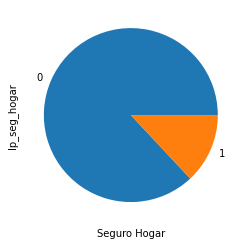

0    392563
1     58811
Name: lp_seg_hogar, dtype: int64


In [65]:
seguro_hogar = pd.value_counts(df['lp_seg_hogar'], sort = True, normalize = True)
print (seguro_hogar)

# Ploteamos el desbalanceo de la variable Target para una mejor visualizacion
# Vemos % y numero de clientes

seguro_hogar.plot(kind = 'pie', rot = 0)
plt.xlabel('Seguro Hogar')
plt.show()
print(df['lp_seg_hogar'].value_counts())

dz
1     6824
2     5957
3     7233
4     4258
5     6524
6     5334
7     4614
8     2274
9     3527
10    6176
11    6090
Name: lp_seg_hogar, dtype: int64


<AxesSubplot:xlabel='dz'>

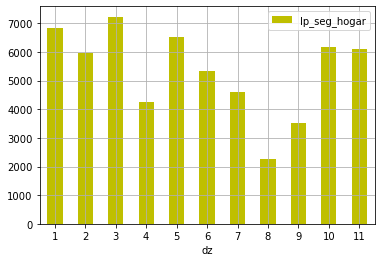

In [50]:
# Numero de clientes con Seguro de Hogar por DZ
print(df.groupby('dz')['lp_seg_hogar'].sum())
df.groupby('dz')['lp_seg_hogar'].sum().plot(kind ='bar',legend = 'Reverse', grid = True, color = 'y', rot = 0)

<AxesSubplot:xlabel='edad'>

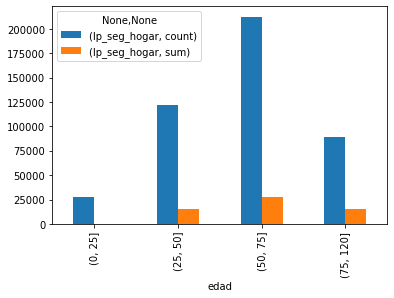

In [67]:
# Clientes con Seguro de Hogar segun las edades
# Count refleja el Numero total de clientes en el segmento edad
# Sum refleja Numero de clientes con Seguro de Hogar
segmentacion_por_edad = pd.cut(df['edad'], bins=(0, 25, 50, 75, 120))
df.groupby(segmentacion_por_edad)[['lp_seg_hogar']].agg(['count','sum']).plot(kind = 'bar')

tipo_gestor              lp_seg_hogar
ASESOR FINANCIERO        0               349347
                         1                54493
SIN GESTOR               0                39209
                         1                 3935
SUBDIRECCIÓN DE OFICINA  0                 4007
                         1                  383
Name: lp_seg_hogar, dtype: int64


<AxesSubplot:xlabel='tipo_gestor,lp_seg_hogar'>

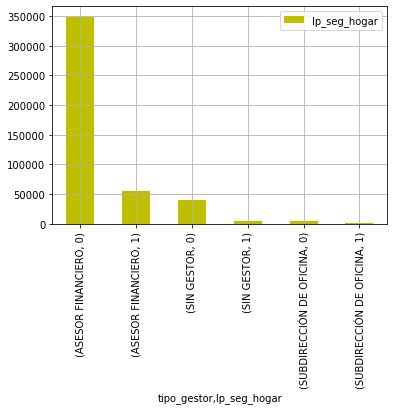

In [36]:
# Distribucion seguros de hogar por tipo de gestor
print(df.groupby('tipo_gestor')['lp_seg_hogar'].value_counts())
df.groupby('tipo_gestor')['lp_seg_hogar'].value_counts().plot(kind ='bar',legend = 'Reverse', grid = True, color = 'y')

lp_dom_ingresos  lp_seg_hogar
0                0               127275
                 1                 4921
1                0               265288
                 1                53890
Name: lp_seg_hogar, dtype: int64


<AxesSubplot:xlabel='lp_dom_ingresos,lp_seg_hogar'>

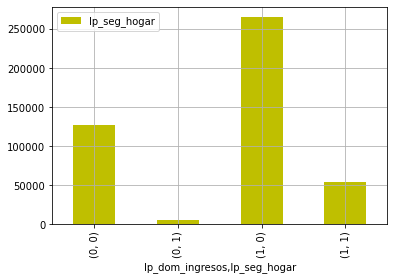

In [39]:
# Distribucion seguros de hogar por ingresos
print(df.groupby('lp_dom_ingresos')['lp_seg_hogar'].value_counts())
df.groupby('lp_dom_ingresos')['lp_seg_hogar'].value_counts().plot(kind ='bar',legend = 'Reverse', grid = True, color = 'y')

# ***** AQUI ME HE QUEDADO EN EDA *****  CONTINUAR EN EL OTRO NB

# ****CONSTRUCCION DEL MODELO****

## Iniciamos la construccion de este primer modelo de clasificacion. 
## (Modelo 0.0) Regresion Lineal
Esta primera aproximacion al modelo se construye sin realizar ningun otro procesamiento.  Se construye en crudo.
   
    - Target Seguro de hogar.
    - Como inputs cogemos todas las variables numericas.( Etiquetadas y no etiquetadas, excepto Uds de Negocio)


In [23]:
# Asignamos Target e Inputs a nuestro modelo
datos_numericos = df.select_dtypes('number')
X = datos_numericos.drop(['lp_seg_hogar'],1) # se inluyen todas las variables
y= df['lp_seg_hogar'] # Target
print('Nº Datos X =', X.size)
print('Dimension X =', X.shape)
print('='*26)
print('Nº Datos y =', y.size)
print('Dimersion y =', y.shape)

Nº Datos X = 6319236
Dimension X = (451374, 14)
Nº Datos y = 451374
Dimersion y = (451374,)


In [24]:
# Cargamos la libreria del modelo de clasificacion que hemos eligido inicialmente.  Regresion Logistica.
from sklearn.linear_model import LogisticRegression

In [25]:
# Creamos la instancia del modelo de clasificacion
modelo00 = LogisticRegression()

In [26]:
# Ajustamos el modelo
modelo00.fit(X,y)

LogisticRegression()

In [27]:
# Hacemos las primeras predicciones
predicciones_modelo00 = modelo00.predict(X)
predicciones_modelo00

array([1, 1, 1, ..., 0, 0, 0])

### ENTRENAMIENTO Train-Test Split 

Vamos a dividir el data set en dos grupos. Uno primero de entrenamiento y un segundo de validacion. 

Este segundo grupo no se utiliza durante el entrenamiento. 

Dado que nuestra base de datos es grande, decidimos dar un peso del 80 % al grupo de entrenamiento y un 20% al grupo de validacion.


In [28]:
# Cargamos la libreria para poder entrenar nuestro modelo
from sklearn.model_selection import train_test_split

In [29]:
# Creamos dos grupos con Input y etiquetas  
# Asignamos la proporcion de 80-20 para el train y el test
test_size = 0.2
seed = 1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = seed)

In [30]:
# Ajustamos y entrenamos solo con el grupo de Entreamiento
modelo00.fit(X_train,y_train)

LogisticRegression()

In [31]:
#  Haemos las prediciones de todo el X_test
predicciones_train_modelo00 = modelo00.predict(X_test)
predicciones_train_modelo00

array([0, 0, 0, ..., 0, 0, 0])

### Utilizacion de Metricas

Una vez realizado nuestro modelo 00 inicial queremos saber como de exacto es para lo cual utilizamos distintas metricas que nos daran datos con los podremos decidir si hay que continuar gestionando el modelo o es un modelo bueno. 

Utilizaremos las metricas mas comunes para los metodos de clasificacion.
    - accuracy_score - precision_score - recall_score - f1_score - roc_curve



In [32]:
# Cargamos librerias de metricas
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

Como primer paso y antes de visualizar el resultado de las metricas, definimos una funcion para imprimir la matriz de confusion para pode entender luego los resultados

In [33]:
def matriz_confusion (modelo):    
    
    matriz_confusion_modelo = confusion_matrix(y_test,modelo.predict(X_test))
    print('False Positives',matriz_confusion_modelo[1][0])
    print('True Positives',matriz_confusion_modelo[1][1])
    pl.matshow(confusion_matrix(y_test,modelo.predict(X_test)))
    pl.title('Matriz de Confusion')
    pl.colorbar()
    pl.show()
     
    return matriz_confusion_modelo

False Positives 11460
True Positives 289


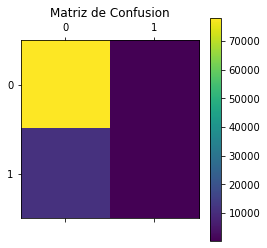

array([[78223,   303],
       [11460,   289]])

In [34]:
matriz_confusion(modelo00)

Los resultados obtenidos en esta matriz de confusion nos son buenos.  Lo que queremos buscar son pocos falsos positivos y altos verdaderos positivos dentro de la etiqueta "1" 

    - Falsos positivos = 11460
    - Verdaderos positivos = 289


Definimos tambien un funcion para vicualizar los resultados del modelo

In [35]:
def model_results (modelo):
    
    ac = accuracy_score(y_test,modelo.predict(X_test))
    print ('accuracy_score = ', ac)  
    pc= precision_score(y_test,modelo.predict(X_test))
    print ('precision_score = ', pc)    
    rr = recall_score(y_test,modelo.predict(X_test))
    print ('recall_score = ', rr)    
    f1 = f1_score(y_test,modelo.predict(X_test))
    print ('fi = ', f1)    
    roc = roc_auc_score(y_test,modelo.predict_proba(X_test)[:, 1])
    print ('roc_auc_score = ', roc)    
    cr = classification_report(y_test, modelo.predict(X_test))
    print ('classification_report')
    print (cr)

    return ()

In [36]:
model_results(modelo00)

accuracy_score =  0.8696981445582941
precision_score =  0.48817567567567566
recall_score =  0.024597838113882033
fi =  0.04683575074953407
roc_auc_score =  0.491758282320779
classification_report
              precision    recall  f1-score   support

           0       0.87      1.00      0.93     78526
           1       0.49      0.02      0.05     11749

    accuracy                           0.87     90275
   macro avg       0.68      0.51      0.49     90275
weighted avg       0.82      0.87      0.82     90275



()

### Conclusiones Modelo 00

Hemos construido el primer modelo de clasificacion de forma directa sin realizar modificaciones o cambio en parametros, desbalanceos, ajustes...etc etc
Los resultados no son buenos en ninguna de las metricas. Es necesario evolucionar el modelo.

## (Modelo 0.1) Regresion Lineal


__Utilizamos OneHotEncoder.__


Tenemos muchas variables categoricas que no hemos utilizado en el anterior modelo. Por ese motivoqueremos asignarles un valor numerico para poder utilizarlas.

Convertimos segun este proceso todas las variables categoricas excepto aquellas que hacen referencia a unidades de negocio.


In [37]:
# importamos la libreria
from sklearn.preprocessing import LabelEncoder
lbl = LabelEncoder()

In [38]:
# convertimos las variables
lbl.fit_transform(df['tipo_gestor'])
lbl.fit_transform(df['esta_carterizado'])
lbl.fit_transform(df['cliente_bbp'])
lbl.fit_transform(df['cartera_patron'])
lbl.fit_transform(df['digital_3_meses'])
lbl.fit_transform(df['camino_digital'])
lbl.fit_transform(df['marca_bp'])
lbl.fit_transform(df['marca_ccte'])
lbl.fit_transform(df['seg_valor'])
lbl.fit_transform(df['seg_recorrido'])

array([1, 0, 1, ..., 3, 3, 0])

In [39]:
# asignamos una columna a cada una de las etiquetas creadas
df['tipo_gestor_etiqueta']=lbl.fit_transform(df['tipo_gestor'])
df['esta_carterizado_etiqueta']=lbl.fit_transform(df['esta_carterizado'])
df['cliente_bbp_etiqueta']=lbl.fit_transform(df['cliente_bbp'])
df['cartera_patron_etiqueta']=lbl.fit_transform(df['cartera_patron'])
df['digital_3_meses_etiqueta']=lbl.fit_transform(df['digital_3_meses'])
df['camino_digital_etiqueta']=lbl.fit_transform(df['camino_digital'])
df['marca_bp_etiqueta']=lbl.fit_transform(df['marca_bp'])
df['marca_ccte_etiqueta']=lbl.fit_transform(df['marca_ccte'])
df['seg_valor_etiqueta']=lbl.fit_transform(df['seg_valor'])
df['seg_recorrido_etiqueta']=lbl.fit_transform(df['seg_recorrido'])

In [40]:
# confirmamos sacando el ejemplo de una de las etiquetas (tipo_gestor) que se han convertido y que coninciden. 
print('tipo_gestor')
print('====================================')
print (df['tipo_gestor_etiqueta'].value_counts())
print('====================================')  
print(df['tipo_gestor'].value_counts())

tipo_gestor
0    403840
1     43144
2      4390
Name: tipo_gestor_etiqueta, dtype: int64
ASESOR FINANCIERO          403840
SIN GESTOR                  43144
SUBDIRECCIÓN DE OFICINA      4390
Name: tipo_gestor, dtype: int64


In [41]:
# eliminamos las columnas que han sido convertidas
df.drop(['tipo_gestor','esta_carterizado','cliente_bbp',
         'cartera_patron','digital_3_meses','camino_digital',
         'marca_bp','marca_ccte','seg_valor','seg_recorrido'],axis = 1,inplace = True)

In [42]:
# confirmamos con un head que se han creado las etiquetas y se han eliminado las columnas
df.head(2)

,cliente,saldo_captacion,gestor,codigo_cartera,saldo_financiacion,saldo_ffii,saldo_plp,lp_dom_ingresos,lp_tjta_cto,lp_tjt_rev,...,tipo_gestor_etiqueta,esta_carterizado_etiqueta,cliente_bbp_etiqueta,cartera_patron_etiqueta,digital_3_meses_etiqueta,camino_digital_etiqueta,marca_bp_etiqueta,marca_ccte_etiqueta,seg_valor_etiqueta,seg_recorrido_etiqueta
0,1,1328106.49,18287.0,14881.0,0.0,1301110.59,14304.39,1,1,1,...,0,1,0,0,1,0,0,0,0,1
1,2,1142234.34,18287.0,14881.0,0.0,1112617.83,0.00,0,0,0,...,0,1,0,0,1,0,0,0,0,0


## __Sacamos el Modelo 01__

In [43]:
# Asignamos Target e Inputs a nuestro modelo
datos_numericos = df.select_dtypes('number')
X = datos_numericos.drop(['lp_seg_hogar'],1)
y= df['lp_seg_hogar']
print('Nº Datos X =', X.size)
print('Dimension X =', X.shape)
print('='*26)
print('Nº Datos y =', y.size)
print('Dimersion y =', y.shape)

Nº Datos X = 10832976
Dimension X = (451374, 24)
Nº Datos y = 451374
Dimersion y = (451374,)


In [44]:
# Creamos la instancia del modelo de clasificacion
modelo01 = LogisticRegression()

In [45]:
# Ajustamos el modelo
modelo01.fit(X,y)

LogisticRegression()

In [46]:
# Hacemos las primeras predicciones
predicciones_modelo01 = modelo01.predict(X)
predicciones_modelo01

array([1, 1, 1, ..., 0, 0, 0])

In [47]:
# Asignamos la proporcion de 80-20 para el train y el test
test_size = 0.2
seed = 1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = seed)

In [48]:
# Ajustamos y entrenamos solo con el grupo de Entreamiento
modelo01.fit(X_train,y_train)

LogisticRegression()

In [49]:
#  Haemos las prediciones de todo el X_test
predicciones_train_modelo01 = modelo01.predict(X_test)
predicciones_train_modelo01

array([0, 0, 0, ..., 0, 0, 0])

False Positives 11229
True Positives 520


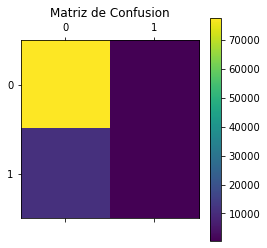

array([[77770,   756],
       [11229,   520]])

In [50]:
matriz_confusion(modelo01)

### Evolutivo Confusion Matrix 

                MODELO            0        1
                ==============================
    - Falsos positivos =       11460     11229
    - Verdaderos positivos =     289       520


In [51]:
model_results(modelo01)

accuracy_score =  0.8672389919689837
precision_score =  0.40752351097178685
recall_score =  0.04425908587964933
fi =  0.07984644913627638
roc_auc_score =  0.7458338085021267
classification_report
              precision    recall  f1-score   support

           0       0.87      0.99      0.93     78526
           1       0.41      0.04      0.08     11749

    accuracy                           0.87     90275
   macro avg       0.64      0.52      0.50     90275
weighted avg       0.81      0.87      0.82     90275



()

In [52]:
def roc_curv (modelo):
    ras = roc_auc_score(y_test,modelo.predict_proba(X_test)[:, 1])
    print('roc_auc_score =', ras)
    fpr, tpr, threshold = roc_curve(y_test,modelo.predict_proba(X_test)[:, 1])
    plt.plot(fpr, tpr)
    plt.xlabel('fpr')
    plt.ylabel('tpr')

    return ()

roc_auc_score = 0.7458338085021267


()

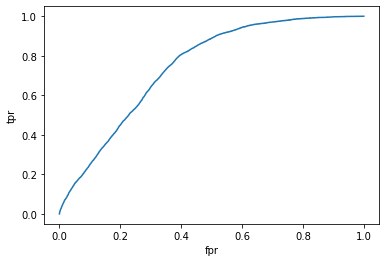

In [53]:
roc_curv(modelo01)


### Evolutivo Metricas                             

      MODELO     0      1         
      ======================
    - Accuracy  0.87 - 0.86 
    - Precision 0.48 - 0.40 
    - Recall    0.02 - 0.04 
    - F1        0.04 - 0.08
    - Curva roc 0.49 - 0.74 
    

### Conclusiones Modelo 01 con OneHotEndoder.

   Utilizando OHE hemos conseguido subir la Curva Roc hasta 0.74. Hemos obtenido mas verdaderos positivos pero totalmente insuficiente.
   
   Seguimos evolucionando el modelo 
   
## (Modelo 0.2) Regresion Lineal

   
 En este caso Normalizaremos las varaibles numericas. 
   

In [54]:
# cargamos la libreria
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [55]:
df_datos_numericos = data = df.select_dtypes('number')

In [56]:
# asignamos nombres a las columnas
columnas_datos_numericos = df_datos_numericos.columns

In [57]:
# normalizamos
df_normalizado = scaler.fit_transform(df_datos_numericos)

In [58]:
# asigamos las columnas
df_normalizado = pd.DataFrame(df_normalizado, columns=columnas_datos_numericos)

In [59]:
# comprobamos
df_normalizado.head(5)

,saldo_captacion,saldo_financiacion,saldo_ffii,saldo_plp,lp_dom_ingresos,lp_tjta_cto,lp_tjt_rev,lp_rbos,lp_of_int,edad,...,tipo_gestor_etiqueta,esta_carterizado_etiqueta,cliente_bbp_etiqueta,cartera_patron_etiqueta,digital_3_meses_etiqueta,camino_digital_etiqueta,marca_bp_etiqueta,marca_ccte_etiqueta,seg_valor_etiqueta,seg_recorrido_etiqueta
0,0.258207,0.001689,0.415566,0.031101,1.0,1.0,1.0,1.0,1.0,0.584746,...,0.0,1.0,0.0,0.0,1.0,0.00,0.0,0.0,0.0,0.333333
1,0.223408,0.001689,0.355362,0.000000,0.0,0.0,0.0,1.0,1.0,0.686441,...,0.0,1.0,0.0,0.0,1.0,0.00,0.0,0.0,0.0,0.000000
2,0.223408,0.001689,0.355362,0.000000,0.0,0.0,0.0,1.0,0.0,0.635593,...,0.0,1.0,0.0,1.0,0.0,0.75,0.0,1.0,0.0,0.333333
3,0.260528,0.001689,0.343695,0.000000,1.0,0.0,0.0,1.0,0.0,0.796610,...,0.0,1.0,0.0,0.0,0.0,0.75,0.0,0.0,0.0,0.333333
4,0.338789,0.001689,0.293617,0.237736,0.0,0.0,0.0,1.0,1.0,0.542373,...,0.0,1.0,0.0,0.0,1.0,0.00,0.0,0.0,0.0,0.333333


## __Sacamos el Modelo 02__

In [60]:
datos_numericos.columns

Index(['saldo_captacion', 'saldo_financiacion', 'saldo_ffii', 'saldo_plp',
       'lp_dom_ingresos', 'lp_tjta_cto', 'lp_tjt_rev', 'lp_rbos', 'lp_of_int',
       'edad', 'lp_seg_vida', 'lp_seg_acc', 'lp_seg_salud', 'lp_seg_hogar',
       'lp_seg_auto', 'tipo_gestor_etiqueta', 'esta_carterizado_etiqueta',
       'cliente_bbp_etiqueta', 'cartera_patron_etiqueta',
       'digital_3_meses_etiqueta', 'camino_digital_etiqueta',
       'marca_bp_etiqueta', 'marca_ccte_etiqueta', 'seg_valor_etiqueta',
       'seg_recorrido_etiqueta'],
      dtype='object')

In [61]:
# Asignamos Target e Inputs a nuestro modelo
datos_numericos = df_normalizado.select_dtypes('number')
X = datos_numericos.drop(['lp_seg_hogar'],1)
y= df_normalizado['lp_seg_hogar']
print('Nº Datos X =', X.size)
print('Dimension X =', X.shape)
print('='*26)
print('Nº Datos y =', y.size)
print('Dimersion y =', y.shape)

Nº Datos X = 10832976
Dimension X = (451374, 24)
Nº Datos y = 451374
Dimersion y = (451374,)


In [62]:
# Creamos la instancia del modelo de clasificacion
modelo02 = LogisticRegression(solver = 'newton-cg')

In [63]:
# Ajustamos el modelo
modelo02.fit(X,y)

LogisticRegression(solver='newton-cg')

In [64]:
# Hacemos las primeras predicciones
predicciones_modelo02 = modelo02.predict(X)
predicciones_modelo02

array([0., 0., 0., ..., 0., 0., 0.])

In [65]:
# Asignamos la proporcion de 80-20 para el train y el test
test_size = 0.2
seed = 1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = seed)

In [66]:
# Ajustamos y entrenamos solo con el grupo de Entreamiento
modelo02.fit(X_train,y_train)

LogisticRegression(solver='newton-cg')

In [67]:
#  Haemos las prediciones de todo el X_test
predicciones_train_modelo02 = modelo02.predict(X_test)
predicciones_train_modelo02

array([0., 0., 0., ..., 0., 0., 0.])

False Positives 10963
True Positives 786


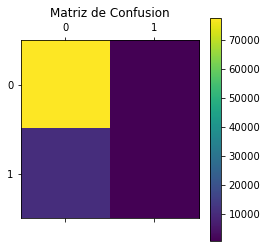

array([[77799,   727],
       [10963,   786]])

In [68]:
matriz_confusion(modelo02)

### Evolutivo Confusion Matrix 

                MODELO            0        1        2
                ======================================
    - Falsos positivos =       11460     11229    10963
    - Verdaderos positivos =     289       520      786

In [69]:
model_results(modelo02)

accuracy_score =  0.8705067848241484
precision_score =  0.5194976867151355
recall_score =  0.0668993105796238
fi =  0.11853415774393
roc_auc_score =  0.8405776541293202
classification_report
              precision    recall  f1-score   support

         0.0       0.88      0.99      0.93     78526
         1.0       0.52      0.07      0.12     11749

    accuracy                           0.87     90275
   macro avg       0.70      0.53      0.52     90275
weighted avg       0.83      0.87      0.82     90275



()

roc_auc_score = 0.8405776541293202


Text(0, 0.5, 'tpr')

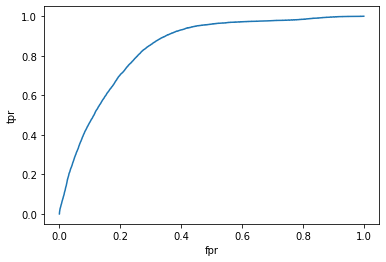

In [70]:
print('roc_auc_score =', roc_auc_score(y_test,modelo02.predict_proba(X_test)[:, 1]))
fpr, tpr, threshold = roc_curve(y_test,modelo02.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr)
plt.xlabel('fpr')
plt.ylabel('tpr')

### Evolutivo Metricas

      MODELO     0      1      2      
      ============================
    - Accuracy  0.87 - 0.86 - 0.87
    - Precision 0.48 - 0.40 - 0.51
    - Recall    0.02 - 0.04 - 0.06
    - F1        0.04 - 0.05 - 0.11
    - Curva roc 0.49 - 0.74 - 0.84
    

### Conclusiones Modelo 02 Normalizando.

Hemos vuelto a aumentar la Curva Roc pero no conseguimos aumentar Recall.

Recordamos que la variable Target esta muy desbalanceada. 

Evolucionamos el modelo solucionando el balanceo.

## (Modelo 0.3) Regresion Lineal



In [71]:
# vemos como esta de desbalanceada la clase_hogar
print(df.shape)
clase_hogar = pd.value_counts(df['lp_seg_hogar'], sort = True, normalize = True)
print (clase_hogar)

(451374, 30)
0    0.869707
1    0.130293
Name: lp_seg_hogar, dtype: float64


% clientes que tienen seguro hogar =  0.13029328228918813


Text(0.5, 0, 'Seguro Hogar')

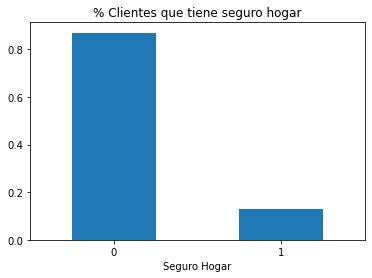

In [72]:
# Ploteamos el desbalanceo de la variable Target para una mejor visualizacion
clase_hogar.plot(kind = 'bar', rot = 0)
porcentaje_con_hogar = clase_hogar[1]
print ('% clientes que tienen seguro hogar = ', porcentaje_con_hogar)
plt.title("% Clientes que tiene seguro hogar")
plt.xlabel('Seguro Hogar')

## __Sacamos el Modelo 03__

In [73]:
# Asignamos Target e Inputs a nuestro modelo
datos_numericos = df_normalizado.select_dtypes('number')
X = datos_numericos.drop(['lp_seg_hogar'],1)
y= df_normalizado['lp_seg_hogar']
print('Nº Datos X =', X.size)
print('Dimension X =', X.shape)
print('='*26)
print('Nº Datos y =', y.size)
print('Dimersion y =', y.shape)

Nº Datos X = 10832976
Dimension X = (451374, 24)
Nº Datos y = 451374
Dimersion y = (451374,)


### Para solucionar el desbalanceo del Target vamos a utilizar 2 estrategias distintas


###  1ª Estrategia: Subsampling en la clase mayoritaria 
    - Con NearMiss
    - Con Smote

###  2ª Estrategia: Parametro Weigth balanced

In [74]:
# 1ª Estrategia NearMiss
modelo03 = LogisticRegression(solver = 'liblinear')

In [75]:
modelo03.fit(X,y)

LogisticRegression(solver='liblinear')

In [76]:
modelo03.predict(X)

array([0., 0., 0., ..., 0., 0., 0.])

In [77]:
from imblearn.under_sampling import NearMiss
nr = NearMiss() 

In [78]:
X_train_miss, y_train_miss = nr.fit_sample(X_train, y_train)  

In [78]:
from collections import Counter
print ("Distribution before resampling {}".format(Counter(y_train)))
print ("Distribution after resampling {}".format(Counter(y_train_miss)))
 

Distribution before resampling Counter({0.0: 314037, 1.0: 47062})
Distribution after resampling Counter({0.0: 47062, 1.0: 47062})


In [80]:
modelo03.fit(X_train_miss, y_train_miss) 

LogisticRegression(solver='liblinear')

In [81]:
modelo03.predict(X_test)

array([0., 1., 0., ..., 0., 1., 0.])

In [82]:
# RESULTADOS BALANCEO CON NEARMISS
print('RESULTADOS MODELO_03')
print('====================================')
print ('accuracy_score = ', accuracy_score(y_test,modelo03.predict(X_test)))
print('====================================')
print('precision =', precision_score(y_test,modelo03.predict(X_test)))
print('====================================')
print('recall =', recall_score(y_test,modelo03.predict(X_test)))
print('====================================')
print('f1_score =', f1_score(y_test,modelo03.predict(X_test)))
print('====================================')
print('roc_auc_score =', roc_auc_score(y_test,modelo03.predict_proba(X_test)[:, 1]))
print('====================================')
print('classification_report')
print(classification_report(y_test, modelo03.predict(X_test)))


RESULTADOS MODELO_03
accuracy_score =  0.5425976183882582
precision = 0.17018331212182106
recall = 0.6487360626436293
f1_score = 0.2696335078534031
roc_auc_score = 0.6122557114754232
classification_report
              precision    recall  f1-score   support

         0.0       0.91      0.53      0.67     78526
         1.0       0.17      0.65      0.27     11749

    accuracy                           0.54     90275
   macro avg       0.54      0.59      0.47     90275
weighted avg       0.81      0.54      0.62     90275



In [96]:
# 1ª Estrategia SMOTE
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 2) 

In [84]:
modelo03 = LogisticRegression(solver = 'liblinear')

In [86]:
modelo03.fit(X,y)

LogisticRegression(solver='liblinear')

In [87]:
modelo03.predict(X)

array([0., 0., 0., ..., 0., 0., 0.])

In [88]:
X_train_smote, y_train_smote = sm.fit_sample(X_train, y_train) 

In [89]:
print ("Distribution before resampling {}".format(Counter(y_train)))
print ("Distribution labels after resampling {}".format(Counter(y_train_smote)))

Distribution before resampling Counter({0.0: 314037, 1.0: 47062})
Distribution labels after resampling Counter({1.0: 314037, 0.0: 314037})


In [91]:
modelo03.fit(X_train_smote, y_train_smote) 

LogisticRegression(solver='liblinear')

In [79]:
modelo03.predict(X_test)

array([0., 0., 0., ..., 0., 0., 0.])

In [80]:
modelo03.predict_proba(X_test)[:, 1]

array([0.29624667, 0.35078752, 0.02074687, ..., 0.20734304, 0.34335961,
       0.00965239])

In [82]:
model_results(modelo03)

accuracy_score =  0.8703295486014955
precision_score =  0.5139338950097213
recall_score =  0.06749510596646523
fi =  0.11931989166415888
roc_auc_score =  0.8407230841238152
classification_report
              precision    recall  f1-score   support

         0.0       0.88      0.99      0.93     78526
         1.0       0.51      0.07      0.12     11749

    accuracy                           0.87     90275
   macro avg       0.70      0.53      0.52     90275
weighted avg       0.83      0.87      0.82     90275



()

In [83]:
# 2ª Estrategia  parametro class_weigth 'balanced' como medida de desbalanceo.
modelo03 = LogisticRegression(solver='newton-cg', class_weight='balanced')

In [84]:
modelo03.fit(X,y)

LogisticRegression(class_weight='balanced', solver='newton-cg')

In [85]:
modelo03.predict(X)

array([1., 1., 0., ..., 0., 0., 0.])

In [86]:
test_size = 0.2
seed = 7
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = seed)

In [87]:
modelo03.fit(X_train,y_train)

LogisticRegression(class_weight='balanced', solver='newton-cg')

In [88]:
modelo03.predict(X_test)

array([1., 1., 1., ..., 1., 1., 0.])

In [89]:
modelo03.predict_proba(X_test)[:, 1]

array([0.59913663, 0.60864129, 0.70789069, ..., 0.66134724, 0.858474  ,
       0.28165642])

False Positives 1328
True Positives 10457


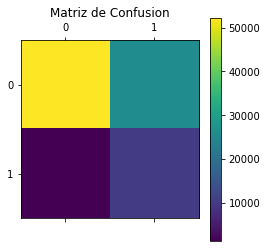

array([[52293, 26197],
       [ 1328, 10457]])

In [91]:
matriz_confusion(modelo03)

### Evolutivo Confusion Matrix 

                MODELO            0        1        2        3
                ==================================================
    - Falsos positivos =       11460     11229    10963     1328
    - Verdaderos positivos =     289       520      786    10457

In [92]:
model_results(modelo03)

accuracy_score =  0.6950983107172528
precision_score =  0.28528946363289137
recall_score =  0.88731438268986
fi =  0.4317595326080225
roc_auc_score =  0.8407239623065678
classification_report
              precision    recall  f1-score   support

         0.0       0.98      0.67      0.79     78490
         1.0       0.29      0.89      0.43     11785

    accuracy                           0.70     90275
   macro avg       0.63      0.78      0.61     90275
weighted avg       0.89      0.70      0.74     90275



()

roc_auc_score = 0.8407239623065678


Text(0, 0.5, 'tpr')

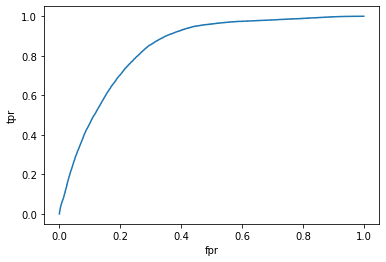

In [81]:
print('roc_auc_score =', roc_auc_score(y_test,modelo03.predict_proba(X_test)[:, 1]))
fpr, tpr, threshold = roc_curve(y_test,modelo03.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr)
plt.xlabel('fpr')
plt.ylabel('tpr')

### Conclusiones 

Hemos utilizado distintas estrategias para solucionar el desbalanceo del Target.  Finalmente el parametro class_weigth 'balanced' es el que mayor resutlado ha obtenido.  Hemos conseguido aumentar el Recall hasta 0,89 y la curva roc hasta 0.84.


### Evolutivo Metricas

      MODELO     0      1      2       3
      =======================================
    - Accuracy  0.87 - 0.86 - 0.87 - 0.69
    - Precision 0.48 - 0.40 - 0.51 - 0.28
    - Recall    0.02 - 0.04 - 0.06 - 0.89
    - F1        0.04 - 0.05 - 0.11 - 0.43
    - Curva roc 0.49 - 0.74 - 0.84 - 0.84
    